## Loading Dependencies

In [1]:
#Importing the required libraries

#For data manipulation and mathematical operations
import pandas as pd
import numpy as np

#For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Reading the dataset
df=pd.read_csv('loan_train.csv')

#Checking the shape of the dataset
print("There are {} rows and {} columns in the dataset".format(df.shape[0], df.shape[1]))

There are 614 rows and 13 columns in the dataset


In [3]:
data1=pd.read_csv('loan_train.csv')

In [5]:
#Checking the head of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Description of only categorical features
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002682,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


We know that there are 614 entries in the dataset and from the above description of categorical variables we can see that there are 614 uniques values in the "Loan_ID" column so there is no points of keeping this variable in our analysis as it has all the values different. So, we would simply drop this column.

In [7]:
#Dropping the "Loan_ID" column
df = df.drop('Loan_ID', axis=1)

In [8]:
#Checking if the column has been dropped or not
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Missing Values Treatment

In [13]:
#Checking for the missing values in the dataset
x = df.isnull().sum()
y = (df.isnull().sum()/df.shape[0])*100
z = {"Number of missing value":x, "Percentage of missing values":y}
z = pd.DataFrame(z)
z.sort_values(by="Percentage of missing values", ascending=False).style.background_gradient(cmap='copper')

,Number of missing value,Percentage of missing values
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


1. We can see that there are 6 columns having Missing values in the data.
2. "Credit_History" column is having 50(which is highest among all) missing values which is about 8% of the total entries in the data.
3. "Gender" and "Dependents" are the two categorical columns which are having missing values.

Now we would treat these missing values with the right approaches.

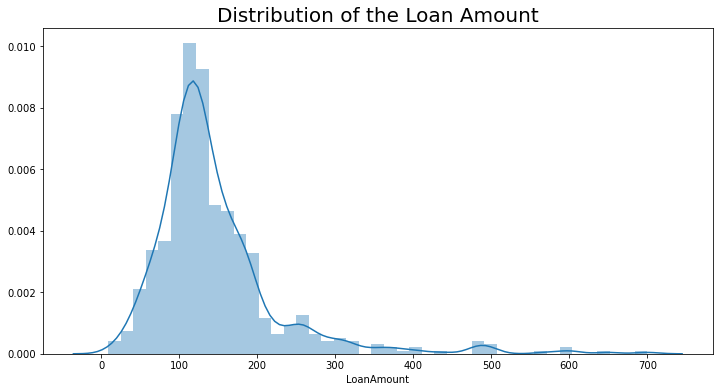

In [14]:
plt.rcParams['figure.figsize'] = (12,6)

sns.distplot(df['LoanAmount'])
plt.title("Distribution of the Loan Amount", fontsize=20)
plt.show()

In [16]:
df['LoanAmount'] = np.log(df['LoanAmount'])

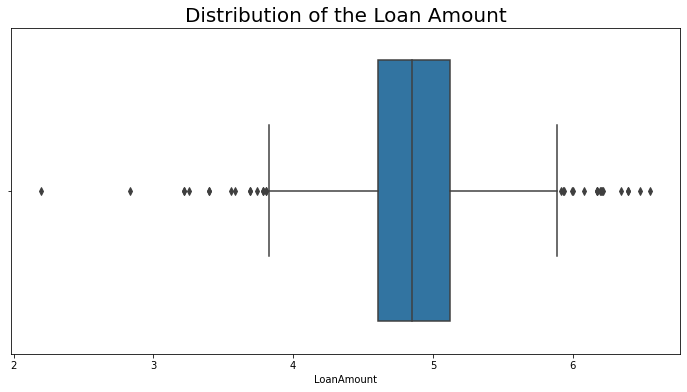

In [17]:
plt.rcParams['figure.figsize'] = (12,6)

sns.boxplot(df['LoanAmount'])
plt.title("Distribution of the Loan Amount", fontsize=20)
plt.show()

In [6]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [7]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(542, 13)

In [11]:
df['Loan_Status'].value_counts()

Y    376
N    166
Name: Loan_Status, dtype: int64

In [12]:
df['Married'].value_counts()

Yes    355
No     187
Name: Married, dtype: int64

In [13]:
df['Education'].value_counts()

Graduate        425
Not Graduate    117
Name: Education, dtype: int64

In [14]:
df['Self_Employed'].value_counts()

No     467
Yes     75
Name: Self_Employed, dtype: int64

In [15]:
df['Property_Area'].value_counts()

Semiurban    209
Urban        174
Rural        159
Name: Property_Area, dtype: int64

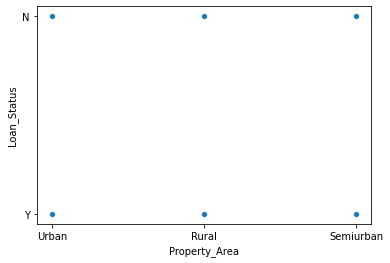

In [16]:
sns.scatterplot(x='Property_Area',y='Loan_Status',data=df)

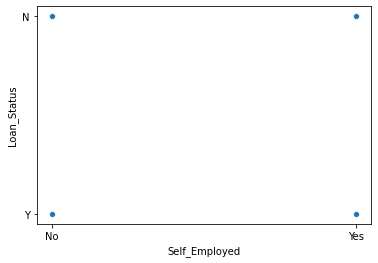

In [17]:
sns.scatterplot(x='Self_Employed',y='Loan_Status',data=df)

In [18]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


In [19]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


In [20]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


In [21]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


In [22]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


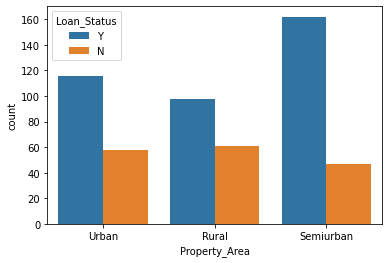

In [23]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

In [24]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

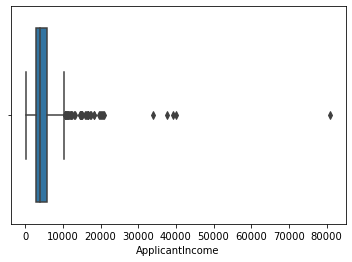

In [25]:
sns.boxplot(df['ApplicantIncome'])

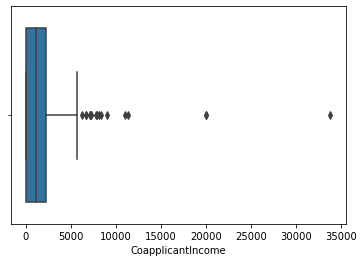

In [26]:
sns.boxplot(df['CoapplicantIncome'])

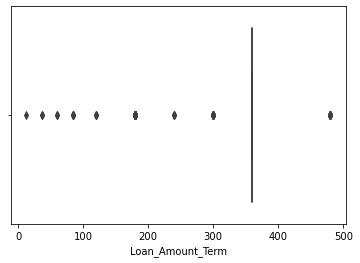

In [27]:
sns.boxplot(df['Loan_Amount_Term'])

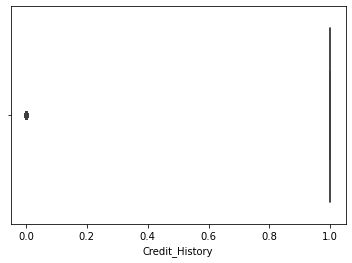

In [28]:
sns.boxplot(df['Credit_History'])

In [29]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,5291.911439,1590.699114,145.518139,341.955720,0.863469
std,5506.461371,2543.801628,81.749385,65.441582,0.343669
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,129.500000,360.000000,1.000000
75%,5820.500000,2281.000000,167.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


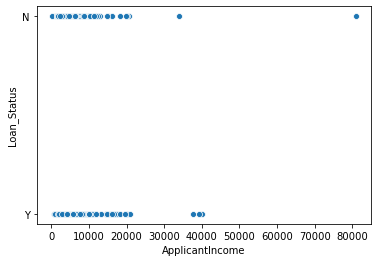

In [30]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=df)

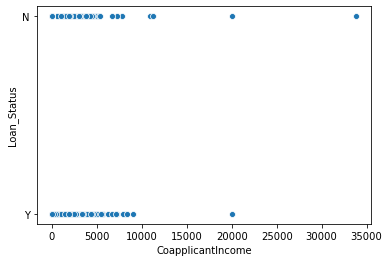

In [31]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df)

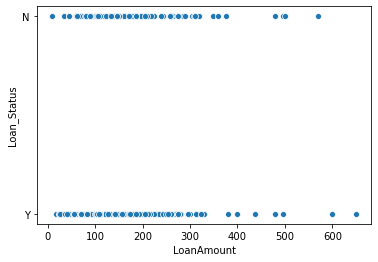

In [32]:
sns.scatterplot(x='LoanAmount',y='Loan_Status',data=df)

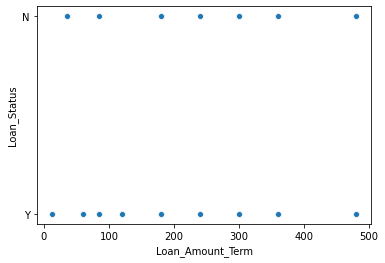

In [33]:
sns.scatterplot(x='Loan_Amount_Term',y='Loan_Status',data=df)

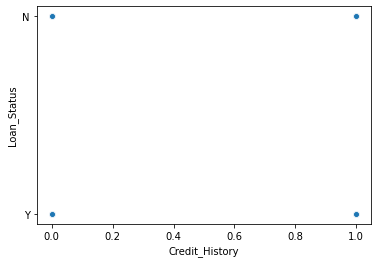

In [34]:
sns.scatterplot(x='Credit_History',y='Loan_Status',data=df)

In [35]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

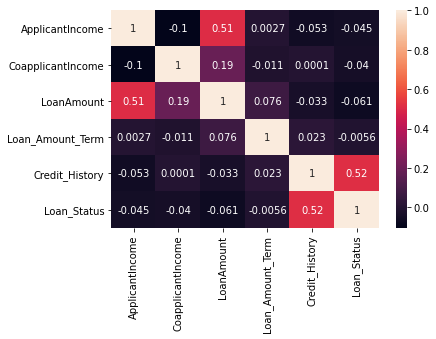

In [36]:
sns.heatmap(df.corr(),annot=True)

In [38]:
df1=df.copy()

In [40]:
#Dropping Unwanted features

df2=df1.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [42]:
df2=df2.drop(labels=['Loan_ID'],axis=1)

In [43]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1


In [44]:
#encoding categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()

In [45]:
#label encoding Property_Area column
df2['Property_Area']=le.fit_transform(df2['Property_Area'])

#label encoding dependent column
df2['Dependents']=le.fit_transform(df2['Dependents'])

In [48]:
df2=pd.get_dummies(df2)

In [49]:
df2.dtypes

Dependents                  int32
Credit_History            float64
Property_Area               int32
Loan_Status                 int64
Gender_Female               uint8
Gender_Male                 uint8
Married_No                  uint8
Married_Yes                 uint8
Education_Graduate          uint8
Education_Not Graduate      uint8
Self_Employed_No            uint8
Self_Employed_Yes           uint8
dtype: object

In [50]:
df2=df2.drop(['Gender_Female','Married_No','Education_Not Graduate','Self_Employed_No'],axis=1)

In [51]:
df2.head()

,Dependents,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes
0,0,1.0,2,1,1,0,1,0
1,1,1.0,0,0,1,1,1,0
2,0,1.0,2,1,1,1,1,1
3,0,1.0,2,1,1,1,0,0
4,0,1.0,2,1,1,0,1,0


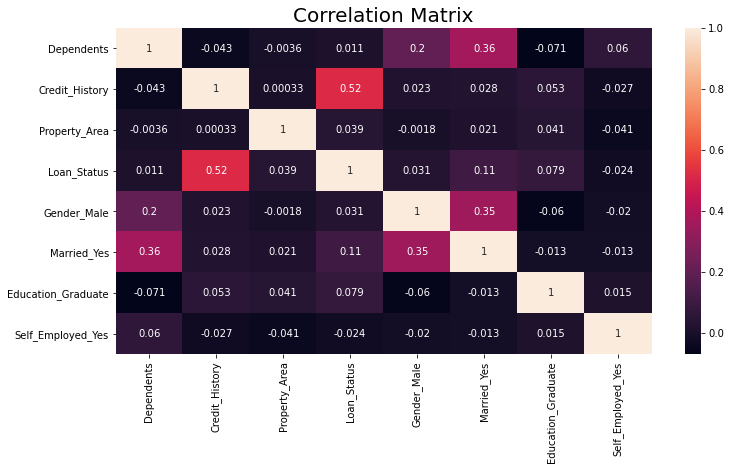

In [53]:
plt.rcParams['figure.figsize'] = (12,6)

sns.heatmap(df2.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

In [54]:
df2=df2.drop(['Property_Area','Gender_Male','Self_Employed_Yes','Dependents',],1)

In [55]:
X=df2.drop('Loan_Status',1)

In [56]:
Y=df2['Loan_Status']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6)

In [59]:
print('Shape of X_train is: ',x_train.shape)
print('Shape of X_test is: ',x_test.shape)
print('Shape of Y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (433, 3)
Shape of X_test is:  (109, 3)
Shape of Y_train is:  (433,)
Shape of y_test is:  (109,)


# Logistic Regression

In [60]:
log=LogisticRegression()

In [61]:
log.fit(x_train,y_train)

LogisticRegression()

In [62]:
log.score(x_train,y_train)

0.7944572748267898

In [63]:
pred=log.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test,pred)

0.8440366972477065

In [66]:
log.intercept_

array([-2.03625594])

In [67]:
log.coef_

array([[2.80424912, 0.42217689, 0.27115464]])

In [68]:
from sklearn import metrics

In [69]:
metrics.confusion_matrix(y_test,pred)

array([[23, 16],
       [ 1, 69]], dtype=int64)

In [70]:
TP=23
FP=1
TN=69
FN=16
acc=(TP+TN)/(TP+TN+FP+FN)
rc=TP/(TP+FN)
pre=TP/(TP+FP)

In [71]:
print(acc)
print(rc)
print(pre)

0.8440366972477065
0.5897435897435898
0.9583333333333334


In [72]:
metrics.precision_score(y_test,pred)


0.8117647058823529

In [73]:
pdf=pd.DataFrame(pred)

In [74]:
data={'y_test':y_test,'pred':pred}
pd.DataFrame(data=data)

,y_test,pred
572,1,1
133,1,1
371,1,1
487,0,1
277,1,1
...,...,...
457,0,1
310,1,1
553,0,0
186,0,0


# Decision Tree Classifier

In [75]:
clf=DecisionTreeClassifier()

In [76]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
clf.score(x_train,y_train)

0.7944572748267898

In [78]:
pred1=clf.predict(x_test)

In [79]:
accuracy_score(y_test,pred1)

0.8440366972477065

In [80]:
cm1=metrics.confusion_matrix(y_test,pred1)

In [81]:
cm1

array([[23, 16],
       [ 1, 69]], dtype=int64)

In [82]:
metrics.f1_score(y_test,pred1)

0.8903225806451613

In [83]:
metrics.recall_score(y_test,pred1)

0.9857142857142858

In [84]:
metrics.precision_score(y_test,pred1)

0.8117647058823529